# This notebook reads in all of my accident data and tabulates it in a single place. It also displays and saves the data. 

In [1]:
# Setup and helper functions

import accidentHandler as aH
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

%matplotlib inline

### Load in my data to an accident handler object.

In [3]:
path = '/home/louisf/Documents/Insight/massdriver/data/crash_data/'
paths = aH.findcsvlist(path)
AT = aH.AccidentTable()
AT.gatherdata(paths)

### Clean it up!

In [11]:
AT.cleanData()

Accidents before cleaning: 368599
Accidents after removing non-geocoded: 348703


### Plot it!

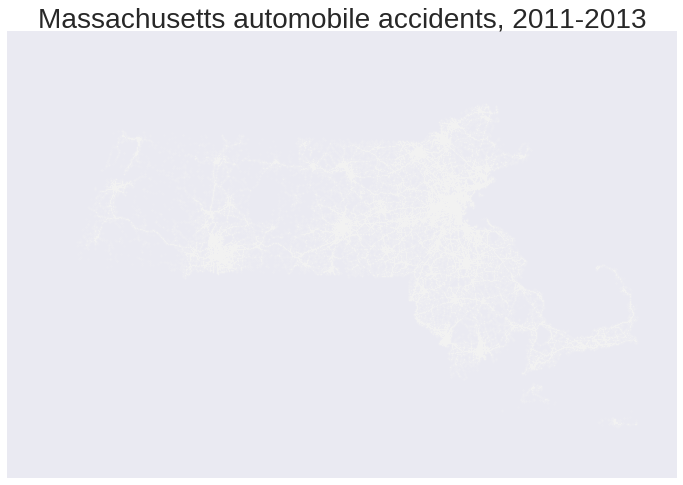

In [42]:
#sb.set(rc={'axes.facecolor':'', 'figure.facecolor':''})
p = plt.figure()
fig = sb.regplot("x", "y",AT.accidents, fit_reg=False, 
                 scatter_kws={"s":6, "alpha":.075, 'color':'w'})
fig.set(xticks=[], yticks=[])


fig.figure.set_size_inches(12,8)
fig.axes.set_title('Massachusetts automobile accidents, 2011-2013', fontsize=28)
fig.set_xlabel("",size = 24)
fig.set_ylabel("",size = 24)
f = fig.get_figure()
p.savefig('accidents.png', transparent=True, dpi=300)

### Let's look at how many road segments are represented.

In [61]:
# accidents reporting location tags
isnu=pd.isnull(AT.accidents['roadsegmentid'])
AT.accidents.shape[0]-np.sum(isnu)

# number of unique road segments
n = AT.accidents['roadsegmentid']
un = (n[~isnu]).unique()
print('The number of unique road segments: {0}.'.format(un.shape[0]))

The number of unique road segments: 102427.


### Write this data to a CSV for later consumption.
#### If I wasn't being lazy, this would be in a database.

In [62]:
AT.accidents.to_csv('/home/louisf/Documents/Insight/massdriver/data/accidents_3yr', delimiter='^')

In [67]:
sum(AT.accidents.speedlimit>0)

188579